In [1]:
import pandas as pd
import numpy as np

In [2]:
# --- 1) Cargar el dataset ---
df = pd.read_csv("admitidos_uni_desde_prepa.csv")

print("✅ Dataset cargado correctamente")
print(f"Registros: {df.shape[0]}, Columnas: {df.shape[1]}")

✅ Dataset cargado correctamente
Registros: 6314, Columnas: 90


In [3]:
# === 2. Información general ===
print("=== Información del dataset ===")
print(df.info())
print("\nNúmero de filas y columnas:", df.shape)

=== Información del dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6314 entries, 0 to 6313
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FECHA                             6314 non-null   object 
 1   PERIODO                           6314 non-null   object 
 2   CAMPUS_UTILIZADO                  6314 non-null   object 
 3   SEDE                              6314 non-null   object 
 4   NACIONALIDAD                      6314 non-null   object 
 5   CLAVE_GENERO                      6314 non-null   object 
 6   DESC_NIVEL_ACAD_SOLICITANTE       6314 non-null   object 
 7   CLAVE_TIPO_ADMISION_TIPO_INGRESO  6314 non-null   object 
 8   AREA                              6314 non-null   object 
 9   CLAVE_MAJOR_PGMA_ACAD             6314 non-null   object 
 10  CLAVE_ESCUELA                     6314 non-null   object 
 11  NOMBRE_ESCUELA                    631

In [4]:
# === 3. Valores faltantes ===
print("\n=== Valores faltantes ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Valores_faltantes': missing, 'Porcentaje': missing_percent})
print(missing_table[missing_table['Valores_faltantes'] > 0].sort_values('Porcentaje', ascending=False))


=== Valores faltantes ===
                          Valores_faltantes  Porcentaje
APORTACION_CAMPUS_TEC                  6314  100.000000
ENSAYO                                 6024   95.407032
RUBRICA                                6022   95.375356
CV                                     6022   95.375356
FECHA_SOLICITUD_ADMISION               3843   60.864745
PUNTAJE_EUC                             305    4.830535
ORIGEN_DE_LA_SOLICITUD                   22    0.348432
V_PERFILES                               21    0.332594
V_BHP                                    21    0.332594
BECA_PERFILES                            21    0.332594
V_POSBTT                                 21    0.332594
V_GAN_BTT                                21    0.332594
BECA_BTT                                 21    0.332594
V_POSSTEAM                               21    0.332594
V_GAN_STEAM                              21    0.332594
BECA_STEAM                               21    0.332594
V_BTA                

In [5]:
# === 4. Estadísticas descriptivas numéricas ===
print("\n=== Estadísticas descriptivas (numéricas) ===")
print(df.describe().T)


=== Estadísticas descriptivas (numéricas) ===
                      count        mean         std  min    25%     50%  \
V_PROM_IND           6314.0   90.046087    5.636427  0.0  86.56  90.485   
V_PAA_IND            6314.0  597.428413  663.237267  0.0   0.00   0.000   
SOLICITUD_INICIADA   6314.0    1.000000    0.000000  1.0   1.00   1.000   
V_PROSPECTO          6314.0    1.000000    0.000000  1.0   1.00   1.000   
V_SOLICITANTE        6314.0    1.000000    0.000000  1.0   1.00   1.000   
...                     ...         ...         ...  ...    ...     ...   
COMITE_NACIONAL_LDM  6293.0    0.000000    0.000000  0.0   0.00   0.000   
V_BECABTE            6293.0    0.009058    0.094747  0.0   0.00   0.000   
V_ANY_BECA           6293.0    0.080089    0.271452  0.0   0.00   0.000   
PRC_BECA_F           6293.0    0.032250    0.136327  0.0   0.00   0.000   
PRC_CREDITO_F        6293.0    0.008049    0.041334  0.0   0.00   0.000   

                        75%     max  
V_PROM_IND    

In [6]:
# === 5. Estadísticas descriptivas categóricas ===
print("\n=== Estadísticas descriptivas (categóricas) ===")
cat_cols = df.select_dtypes(include=['object']).columns
print(df[cat_cols].describe().T)


=== Estadísticas descriptivas (categóricas) ===
                                 count unique                            top  \
FECHA                             6314      1       2024-03-04T00:00:00.000Z   
PERIODO                           6314      1                           AD24   
CAMPUS_UTILIZADO                  6314     21                      Monterrey   
SEDE                              6314     21                            MTY   
NACIONALIDAD                      6314     26                       Mexicana   
CLAVE_GENERO                      6314      2                              F   
DESC_NIVEL_ACAD_SOLICITANTE       6314      1                    Profesional   
CLAVE_TIPO_ADMISION_TIPO_INGRESO  6314      3                             P5   
AREA                              6314      9                            NEG   
CLAVE_MAJOR_PGMA_ACAD             6314     58                            NEG   
CLAVE_ESCUELA                     6314     30                         H

In [7]:
# === 6. Revisar valores únicos (cardinalidad) de variables categóricas ===
print("\n=== Cardinalidad de variables categóricas ===")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")


=== Cardinalidad de variables categóricas ===
FECHA: 1 valores únicos
PERIODO: 1 valores únicos
CAMPUS_UTILIZADO: 21 valores únicos
SEDE: 21 valores únicos
NACIONALIDAD: 26 valores únicos
CLAVE_GENERO: 2 valores únicos
DESC_NIVEL_ACAD_SOLICITANTE: 1 valores únicos
CLAVE_TIPO_ADMISION_TIPO_INGRESO: 3 valores únicos
AREA: 9 valores únicos
CLAVE_MAJOR_PGMA_ACAD: 58 valores únicos
CLAVE_ESCUELA: 30 valores únicos
NOMBRE_ESCUELA: 29 valores únicos
DESC_CIUDAD_ESCUELA: 26 valores únicos
DESC_MUNICIPIO_ESCUELA: 25 valores únicos
DESC_ESTADO_ESCUELA: 19 valores únicos
DESC_PAIS_ESCUELA: 1 valores únicos
V_TEC_NO_TEC: 1 valores únicos
FECHA_SOLICITUD_ADMISION: 87 valores únicos
FECHA_DECISION_ADMISION_FINAL: 129 valores únicos
PERFIL: 1 valores únicos
CLAVE_DECISION_ADMISION_FINAL: 1 valores únicos
V_DECISION_FINAL1: 1 valores únicos
CAMPUS_APORTACION: 25 valores únicos
ORIGEN_DE_LA_SOLICITUD: 4 valores únicos
DISCIPLINA: 4 valores únicos
TIPO_BECA_F: 4 valores únicos
matricula: 6314 valores ú

In [8]:
# Buscar columnas con un solo valor único
const_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columnas que aún son constantes:", const_cols)

# Buscar columnas donde todos los valores son distintos
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]

print("Columnas con todos los valores únicos:")
print(unique_cols)
print(f"Total: {len(unique_cols)}")


Columnas que aún son constantes: ['FECHA', 'PERIODO', 'DESC_NIVEL_ACAD_SOLICITANTE', 'DESC_PAIS_ESCUELA', 'SOLICITUD_INICIADA', 'V_PROSPECTO', 'V_SOLICITANTE', 'V_ADMITIDO', 'V_RECHAZADO', 'PENDIENTE_DE_DECISION', 'V_TEC_NO_TEC', 'PERFIL', 'CLAVE_DECISION_ADMISION_FINAL', 'V_DECISION_FINAL1', 'ComiteNacional_LDM', 'V_GAN_LDM', 'BECA_LDM', 'V_GANADORBTA', 'BECABTA', 'V_GAN_BTC', 'BECA_BTC', 'V_GAN_BEM', 'BECA_BTEM', 'V_SOL_PERFIL_BTEM', 'V_SOL_PERFIL_BTA', 'V_SOL_PERFIL_BTC', 'V_SOL_PERFILES', 'V_PERFILES', 'BECA_PERFILES', 'V_POSBTT', 'V_GAN_BTT', 'BECA_BTT', 'V_POSSTEAM', 'V_GAN_STEAM', 'BECA_STEAM', 'V_BTA', 'V_LDM', 'COMITE_NACIONAL_LDM', 'NIVEL_N', 'ORIGEN_N']
Columnas con todos los valores únicos:
['matricula']
Total: 1


In [13]:
cols_to_remove = [
    # Constantes
    'FECHA', 'PERIODO', 'DESC_NIVEL_ACAD_SOLICITANTE', 'DESC_PAIS_ESCUELA',
    'SOLICITUD_INICIADA', 'V_PROSPECTO', 'V_SOLICITANTE', 'V_ADMITIDO',
    'V_RECHAZADO', 'PENDIENTE_DE_DECISION', 'V_TEC_NO_TEC', 'PERFIL',
    'CLAVE_DECISION_ADMISION_FINAL', 'V_DECISION_FINAL1', 'ComiteNacional_LDM',
    'V_GAN_LDM', 'BECA_LDM', 'V_GANADORBTA', 'BECABTA', 'V_GAN_BTC', 'BECA_BTC',
    'V_GAN_BEM', 'BECA_BTEM', 'V_SOL_PERFIL_BTEM', 'V_SOL_PERFIL_BTA',
    'V_SOL_PERFIL_BTC', 'V_SOL_PERFILES', 'V_PERFILES', 'BECA_PERFILES',
    'V_POSBTT', 'V_GAN_BTT', 'BECA_BTT', 'V_POSSTEAM', 'V_GAN_STEAM',
    'BECA_STEAM', 'V_BTA', 'V_LDM', 'COMITE_NACIONAL_LDM', 'NIVEL_N', 'ORIGEN_N',
    
    # Todos los valores únicos
    'matricula',

    # Columnas en su mayoria vacias
    'APORTACION_CAMPUS_TEC', 'ENSAYO', 'RUBRICA', 'CV', 'FECHA_SOLICITUD_ADMISION'

]

# Eliminar las columnas
df = df.drop(columns=[c for c in cols_to_remove if c in df.columns], errors='ignore')

print("✅ Columnas constantes y únicas eliminadas correctamente.")
print("Dimensiones actuales del dataset:", df.shape)


✅ Columnas constantes y únicas eliminadas correctamente.
Dimensiones actuales del dataset: (6314, 44)


In [14]:
const_cols = [col for col in df.columns if df[col].nunique() == 1]
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]

print("Constantes restantes:", const_cols)
print("Únicas restantes:", unique_cols)


Constantes restantes: []
Únicas restantes: []


In [16]:
# --- Revisar las columnas que quedan ---
print("Columnas restantes después de la limpieza:")
print(df.columns.tolist())

# --- AGRUPAR VARIABLES POR TEMÁTICA ---

academic_cols = [col for col in df.columns if col in [
    'V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC', 'RUBRICA', 'ENSAYO', 'CV'
]]

beca_cols = [col for col in df.columns if any(x in col.upper() for x in ['BECA', 'CREDITO', 'PRC_BECA'])]

origin_cols = [col for col in df.columns if col in [
    'NACIONALIDAD', 'CLAVE_GENERO', 'EDAD', 'ORIGEN_DE_LA_SOLICITUD', 'ORIGEN_N'
]]

campus_cols = [col for col in df.columns if any(x in col.upper() for x in ['CAMPUS', 'SEDE', 'AREA', 'APORTACION'])]

target_col = ['INSCRITO'] if 'INSCRITO' in df.columns else []

# --- Mostrar resumen de clasificación ---
print("\n--- Variables académicas ---")
print(academic_cols)
print("\n--- Variables socioeconómicas / becas ---")
print(beca_cols)
print("\n--- Variables de origen / demográficas ---")
print(origin_cols)
print("\n--- Variables institucionales ---")
print(campus_cols)
print("\n--- Variable objetivo ---")
print(target_col)

print("\nResumen de grupos:")
print(f"Académicas: {len(academic_cols)} | Becas: {len(beca_cols)} | Origen: {len(origin_cols)} | Campus: {len(campus_cols)}")


Columnas restantes después de la limpieza:
['CAMPUS_UTILIZADO', 'SEDE', 'NACIONALIDAD', 'CLAVE_GENERO', 'CLAVE_TIPO_ADMISION_TIPO_INGRESO', 'AREA', 'CLAVE_MAJOR_PGMA_ACAD', 'CLAVE_ESCUELA', 'NOMBRE_ESCUELA', 'DESC_CIUDAD_ESCUELA', 'DESC_MUNICIPIO_ESCUELA', 'DESC_ESTADO_ESCUELA', 'V_PROM_IND', 'V_PAA_IND', 'FECHA_DECISION_ADMISION_FINAL', 'IPP', 'INSCRITO', 'CAMPUS_APORTACION', 'EDAD', 'ORIGEN_DE_LA_SOLICITUD', 'PUNTAJE_EUC', 'V_PLDM', 'V_SOL_BSE', 'BECA_SOAF', 'CREDITO_SOAF', 'V_POSTDTA', 'V_POSTULADOBTE', 'v_becadobte', 'BECABTE', 'DISCIPLINA', 'V_POSBCRE', 'BECA_BHP', 'V_POSBEM', 'V_BHP', 'V_BSE', 'v_anybeca', 'POST_ANYBECA', 'prcBeca_f', 'prcCredito_f', 'TIPO_BECA_F', 'V_BECABTE', 'V_ANY_BECA', 'PRC_BECA_F', 'PRC_CREDITO_F']

--- Variables académicas ---
['V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC']

--- Variables socioeconómicas / becas ---
['BECA_SOAF', 'CREDITO_SOAF', 'v_becadobte', 'BECABTE', 'BECA_BHP', 'v_anybeca', 'POST_ANYBECA', 'prcBeca_f', 'prcCredito_f', 'TIPO_BECA_F', 'V_BE

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

Distribución de INSCRITO:
INSCRITO
1    79.87013
0    20.12987
Name: proportion, dtype: float64


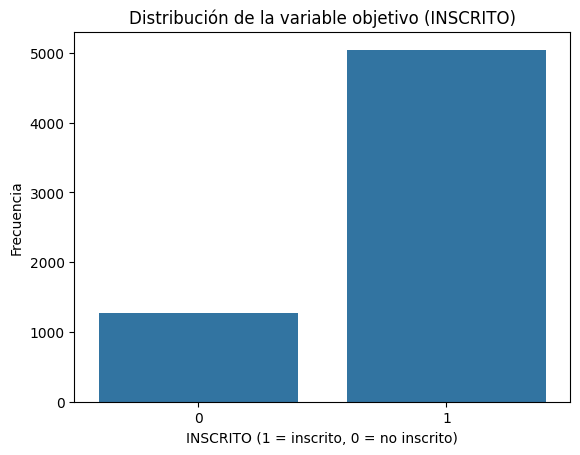

In [18]:
# =====================
# 1. Variable objetivo
# =====================
print("Distribución de INSCRITO:")
print(df['INSCRITO'].value_counts(normalize=True) * 100)

sns.countplot(x='INSCRITO', data=df)
plt.title("Distribución de la variable objetivo (INSCRITO)")
plt.xlabel("INSCRITO (1 = inscrito, 0 = no inscrito)")
plt.ylabel("Frecuencia")
plt.show()


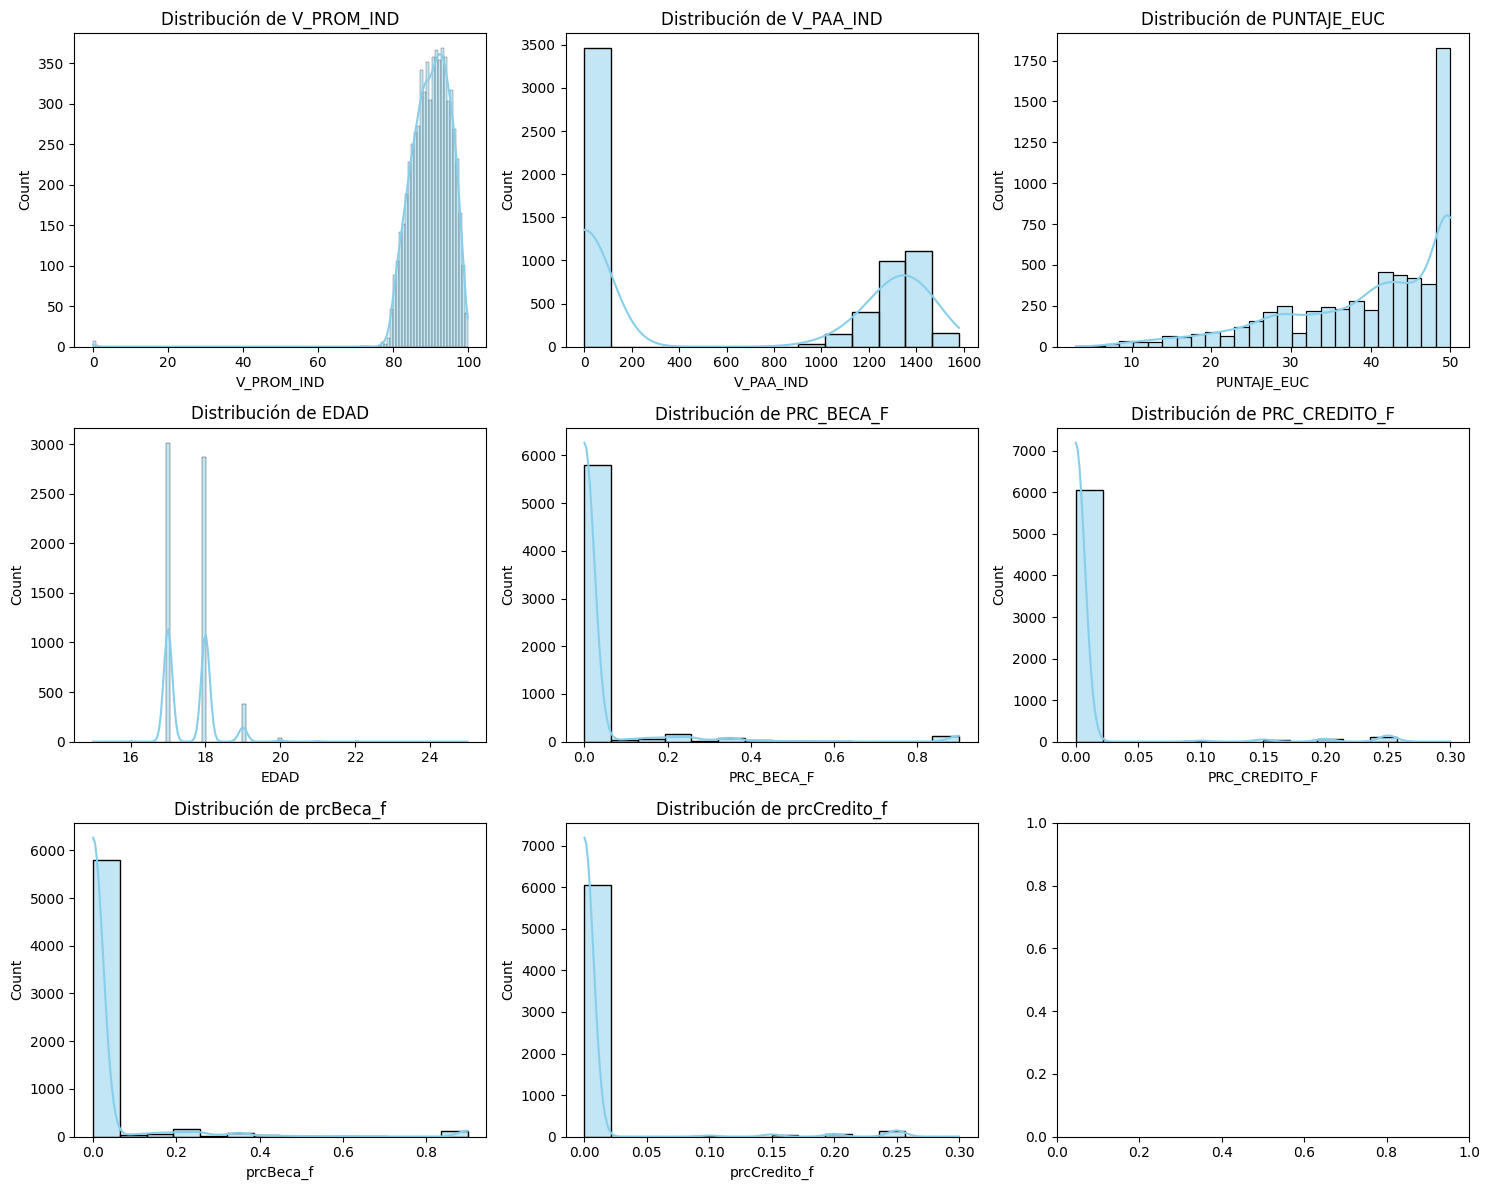

In [24]:
# =====================
# Variables numéricas
# =====================
num_cols = [c for c in [
    'V_PROM_IND','V_PAA_IND','PUNTAJE_EUC','EDAD',
    'PRC_BECA_F','PRC_CREDITO_F','prcBeca_f','prcCredito_f'
] if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

# --- 1. Histogramas con KDE ---
n = len(num_cols)
cols = 3  # número de columnas por fila
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribución de {col}")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

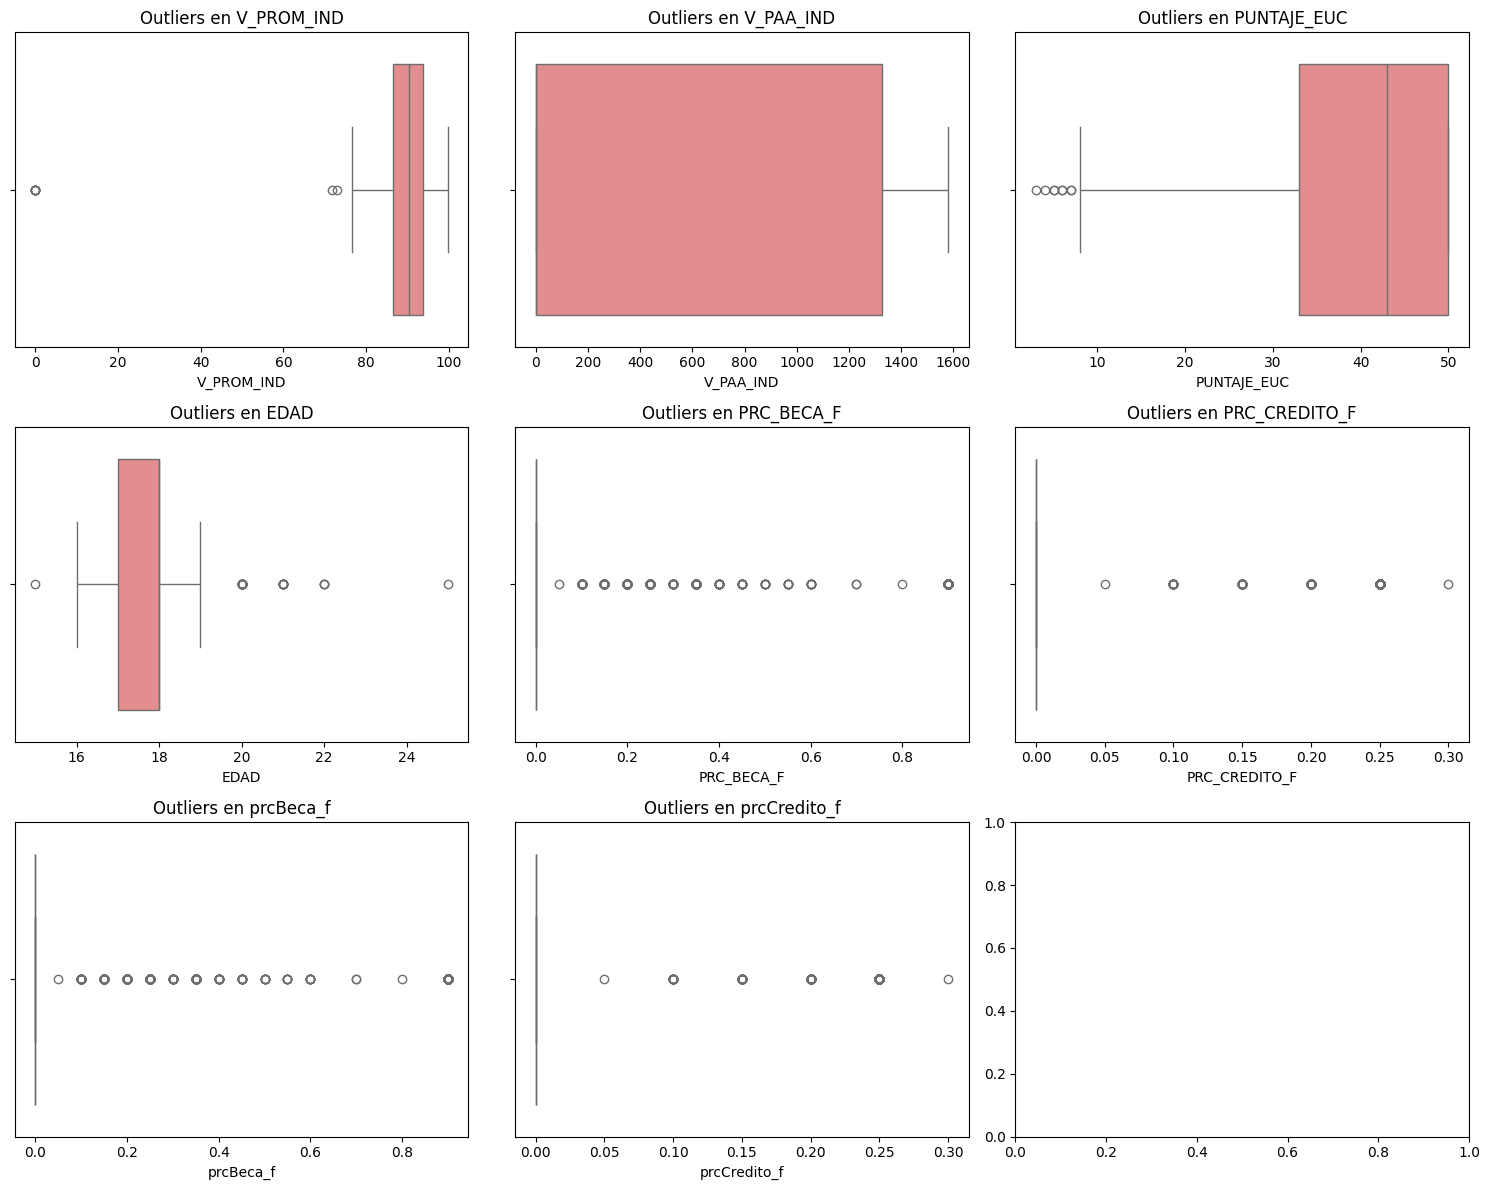

In [25]:
# --- 2. Boxplots ---
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
        axes[i].set_title(f"Outliers en {col}")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


=== Correlaciones con INSCRITO ===
INSCRITO         1.000000
V_PAA_IND        0.240735
V_PROM_IND       0.162782
PRC_CREDITO_F    0.086559
prcCredito_f     0.086559
PRC_BECA_F       0.073225
prcBeca_f        0.073225
PUNTAJE_EUC     -0.010754
EDAD            -0.058147
Name: INSCRITO, dtype: float64


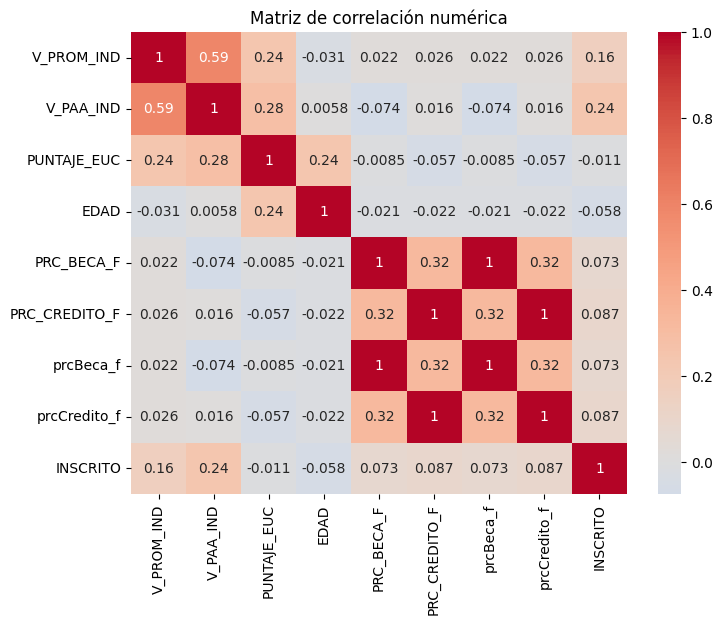

In [26]:
# =====================
# 4. Correlaciones numéricas con INSCRITO
# =====================
corr = df[num_cols + ['INSCRITO']].corr()
print("\n=== Correlaciones con INSCRITO ===")
print(corr['INSCRITO'].sort_values(ascending=False))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación numérica")
plt.show()

/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_38814/3783002238.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_38814/3783002238.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
/var/folders/h0/b13bg9zj0jz86p5c4js5ybn80000gn/T/ipykernel_38814/3783002238.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=co

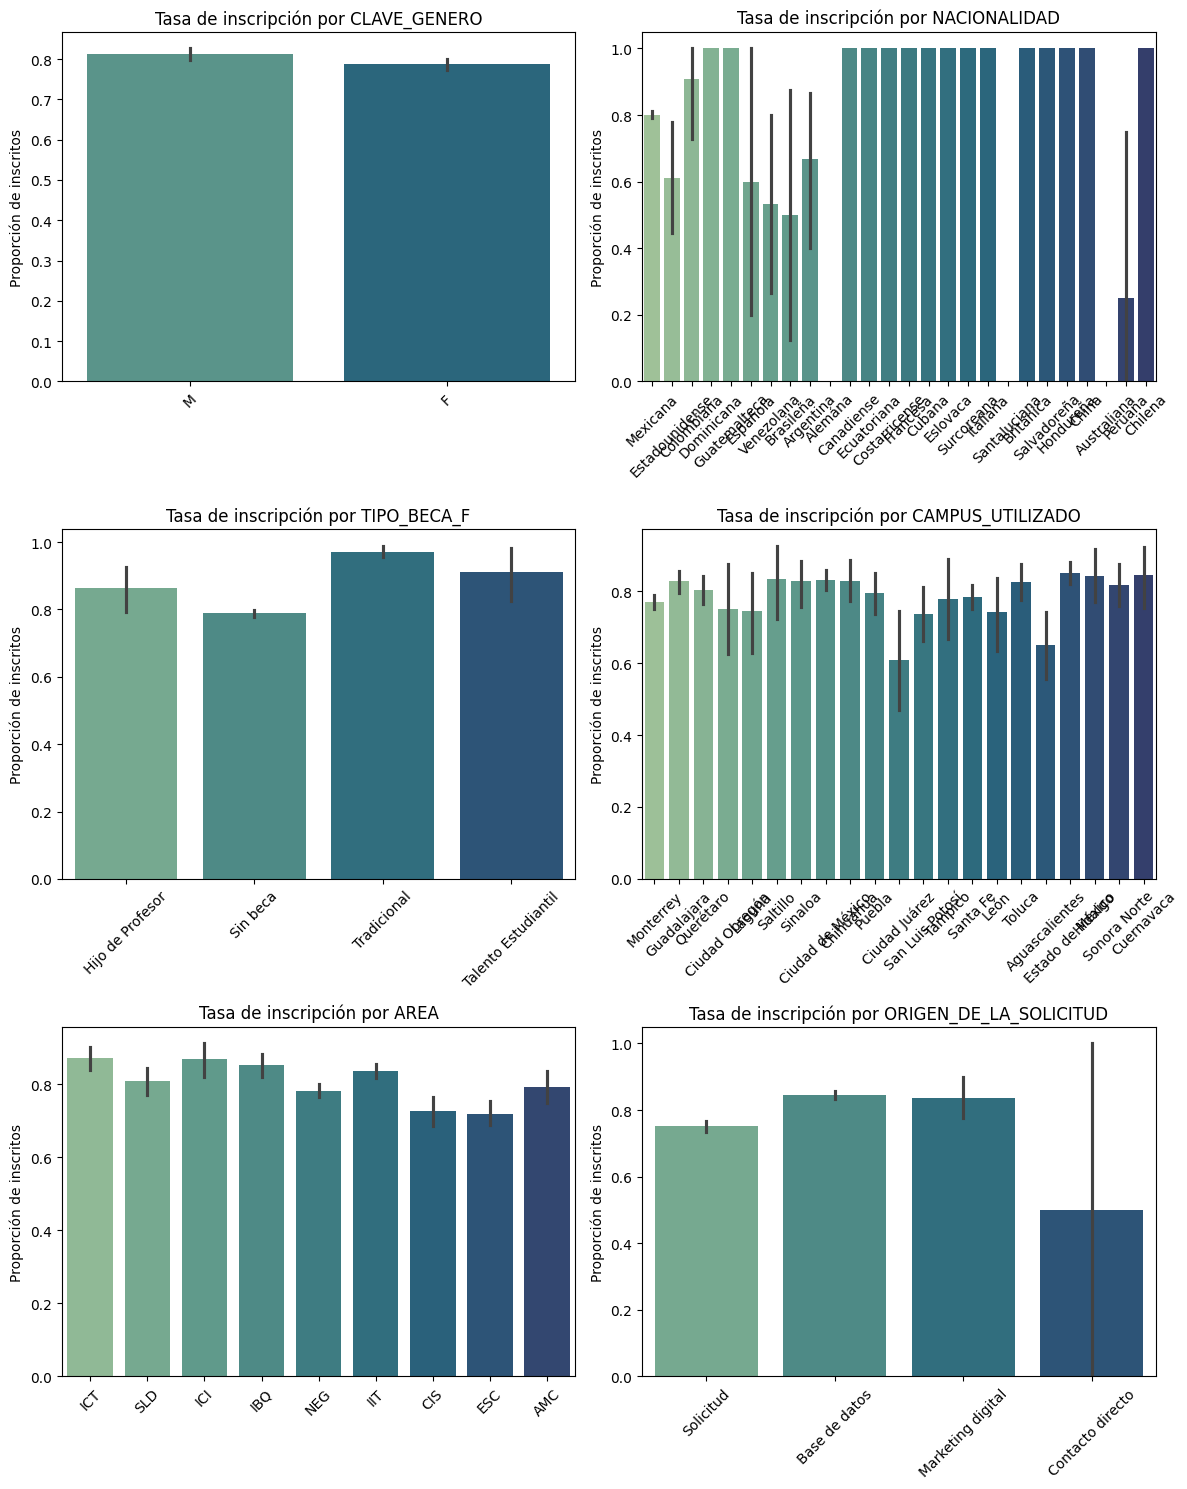

In [23]:
# =====================
# 5. Análisis bivariado con variables categóricas (en grid)
# =====================
cat_cols = [
    'CLAVE_GENERO',
    'NACIONALIDAD',
    'TIPO_BECA_F',
    'CAMPUS_UTILIZADO',
    'AREA',
    'ORIGEN_DE_LA_SOLICITUD'
]

# Definir tamaño del grid
n = len(cat_cols)
cols = 2  # Número de columnas por fila (ajústalo a 2 o 3 según la cantidad)
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if col in df.columns:
        sns.barplot(x=col, y='INSCRITO', data=df, estimator=np.mean, ax=axes[i], palette='crest')
        axes[i].set_title(f"Tasa de inscripción por {col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Proporción de inscritos")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [27]:
# === Variables a revisar / transformar ===
# PAA ceros → missing
df['V_PAA_MISSING'] = (df['V_PAA_IND'] == 0).astype(int)
df['V_PAA_IND'] = df['V_PAA_IND'].replace(0, np.nan)

# Edad fuera de rango
df = df[(df['EDAD'] >= 15) & (df['EDAD'] <= 30)]

# Duplicados de porcentaje: eliminar uno si son equivalentes
df.drop(columns=['prcBeca_f', 'prcCredito_f'], inplace=True)

# Agrupar categorías con baja frecuencia
df['NACIONALIDAD'] = df['NACIONALIDAD'].apply(
    lambda x: x if df['NACIONALIDAD'].value_counts()[x] > 30 else 'Otros'
)
df['CAMPUS_UTILIZADO'] = df['CAMPUS_UTILIZADO'].apply(
    lambda x: x if df['CAMPUS_UTILIZADO'].value_counts()[x] > 30 else 'Otros'
)

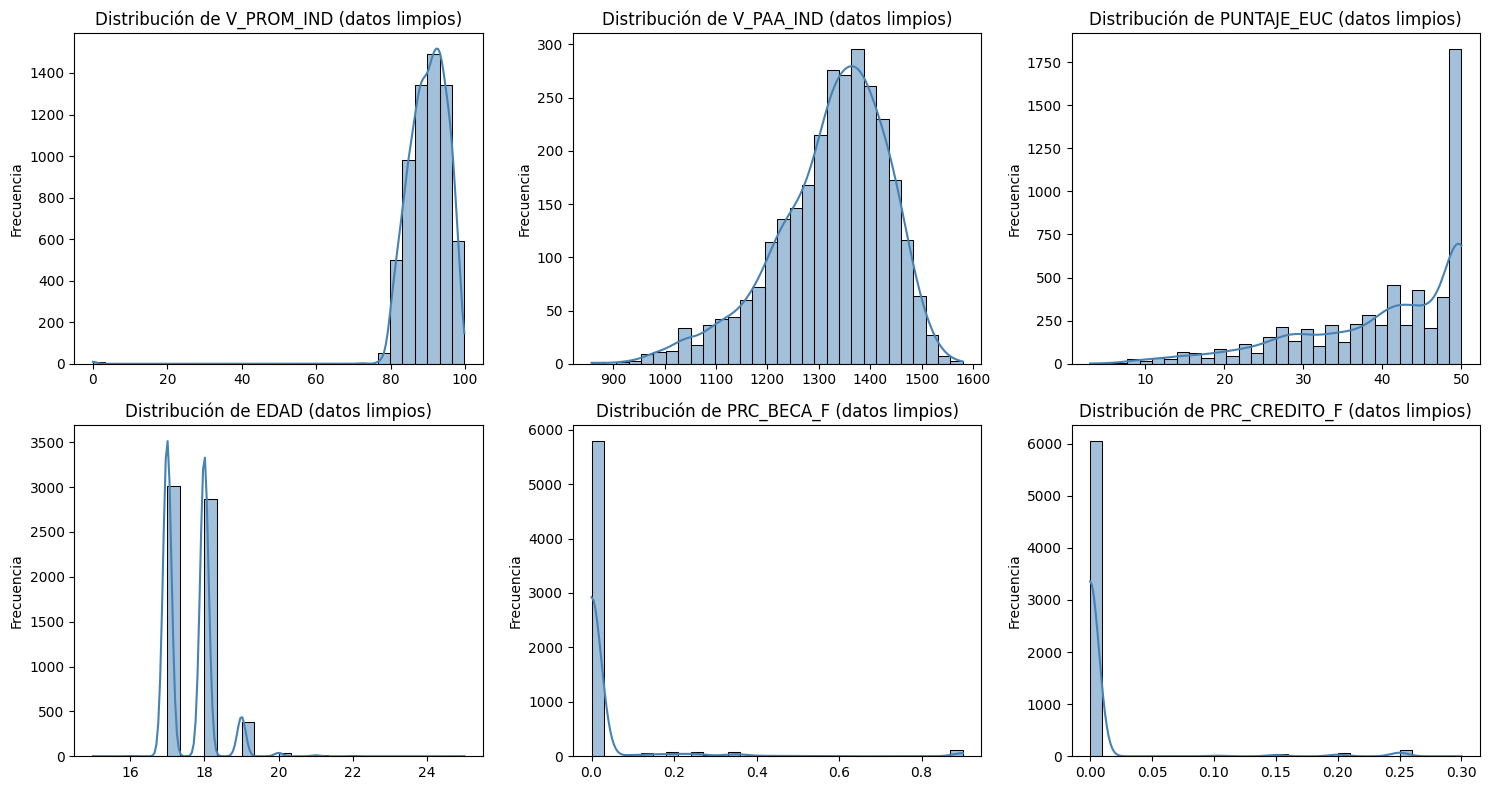

In [28]:
# --- Variables numéricas limpias ---
num_cols = [
    'V_PROM_IND', 'V_PAA_IND', 'PUNTAJE_EUC',
    'EDAD', 'PRC_BECA_F', 'PRC_CREDITO_F'
]

# --- Grid dinámico ---
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i], color='steelblue', bins=30)
        axes[i].set_title(f"Distribución de {col} (datos limpios)")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia")
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

El conjunto de datos del grupo **Profesional**, compuesto por **6,314 registros y 44 variables**, fue depurado eliminando columnas constantes, identificadores únicos y campos con alta proporción de valores nulos. Tras la limpieza, no se detectaron inconsistencias en las variables numéricas ni categóricas, y las distribuciones resultaron coherentes con el contexto académico y socioeconómico de los aspirantes.

En términos descriptivos, los estudiantes muestran **promedios académicos altos (V_PROM_IND ≈ 90)** y **puntajes PAA competitivos (~1,300)**, con edades concentradas entre **16 y 22 años**. La mayoría **no cuenta con beca ni crédito educativo**, lo que genera sesgos marcados hacia cero en las variables financieras (`PRC_BECA_F`, `PRC_CREDITO_F`). No se observaron valores atípicos erróneos, únicamente casos de alto rendimiento académico o apoyo económico elevado.

Las correlaciones entre las variables numéricas y la variable objetivo `INSCRITO` fueron **bajas (|r| < 0.2)**, lo que sugiere que la decisión de inscripción es un fenómeno **multifactorial**, influido por la combinación de desempeño académico, apoyos económicos y contexto institucional.

En el análisis bivariado, se evidenciaron diferencias relevantes por **campus** y **tipo de beca**, mientras que el **género**, la **nacionalidad** y el **área académica** mostraron variaciones menores. La variable objetivo presenta un **leve desbalance** (~80% inscritos, 20% no inscritos), adecuado para modelado con estrategias de ponderación o muestreo estratificado.

En síntesis, el dataset se encuentra **limpio, estructurado y listo para la fase de modelado predictivo**.  
Las variables más prometedoras para explicar la **inscripción** son:  
**V_PROM_IND**, **V_PAA_IND**, **TIPO_BECA_F**, **CAMPUS_UTILIZADO** y **EDAD**.

In [29]:
# Nombre del archivo de salida (puedes cambiarlo según tu organización)
output_path = "profesional_tec_limpio.csv"

# Guardar el dataset sin el índice
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"✅ Archivo exportado correctamente: {output_path}")

✅ Archivo exportado correctamente: profesional_tec_limpio.csv
